In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)

c:\users\tea\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


# Tour de France v zadnjih 5 letih

Projekt pri programiranju 1 obsega zajem in analizo izbranih podatkov.

Sama sem iz spletnih strani www.procyclingstats.com in wikipedia zajela sledeče:

 * splošne razvrstitve: 
   imena, starosti, ekipe, države in čase tekmovalcev
 * specifične razvrstitve:
   imena, ekipe in države tekmovalcev(pri beli majici tudi čase), 
   dolžine in vrste etap
   
Zavedam se, da je 5 let odločno premalo, da bi lahko potegnila določene zaključke,
vendar pa je to le nakaz, kaj vse se da analizirati in raziskati o Touru (v resnici le drobec tega).

In [2]:
tab = pd.read_csv('rumena.csv')

Moje osnovne tabele izgledajo takole:

In [9]:
tab[:10]

,mesto,ime_tekmovalca,država,ekipa,čas
leto,,,,,
2012,1,Bradley Wiggins,Velika Britanija,Team Sky,87:34:47
2012,2,Chris Froome,Velika Britanija,Team Sky,3:21
2012,3,Vincenzo Nibali,Italija,Liquigas-Cannondale,6:19
2012,4,Jurgen van den Broeck,Belgija,Lotto-Belisol,10:15
2012,5,Tejay van Garderen,ZDA,BMC Racing Team,11:04
2012,6,Haimar Zubeldia,Španija,RadioShack-Nissan,15:41
2012,7,Cadel Evans,Avstralija,BMC Racing Team,15:49
2012,8,Pierre Rolland,Francija,Team Europcar,16:26
2012,9,Janez Brajkovič,Slovenija,Astana,16:33


OPOMBA:

Določene ekipe so se v preteklih 5 letih večkrat preimenovale
(npr. "Saxo Bank–Tinkoff Bank" ~> "Saxo-Tinkoff" ~> "Tinkoff-Saxo" ~> "Tinkoff")
in sočasno spremenile sestavo(ali pa tudi ne). Da bi se izognila 
zapletom (v kolikšni meri je "nova" ekipa lahko smatrana kot 
ekvivalentna "stari"), obravnavam vse ekipe z različnim imenom
kot samostojne (tj. v zgornjem primeru imamo 4 različne ekipe).

## 1) Končni nosilci rumene majice in zasledovalci 

*Nosilec rumene majice (oz. zmagovalec Toura) je zmagovalec v skupnem seštevku časov vseh etap.*

### Najuspešnejša država/ekipa skozi leta po končni razvrstitvi

V tem razdelku se seveda pojavi problem iz opombe. Nekatere ekipe so namreč
prisotne vsa leta, nekatere le eno... Enako je pravzaprav z državami, saj v nasprotju
s "kolesarskimi velesilami" udeležba ostalih ni tako samoumevna.
(Sploh pa se večkrat govori o ekipah kot o državah, iz katerih prihajajo 
tekmovalci.)
Karkorkoli že, za najuspešnejšo štejem tisto ekipo, ki prednjači po vseh kriterijih,
torej tudi po tem, koliko let je sodelovala (pod istim imenom in ne glede na zasedbo).

In [9]:
naj50 = tab[tab.mesto <= 50]
naj10 = tab[tab.mesto <= 10]

Najprej si oglejmo, kateri so najbolje uvrščeni tekmovalci v zadnjih 5 letih.

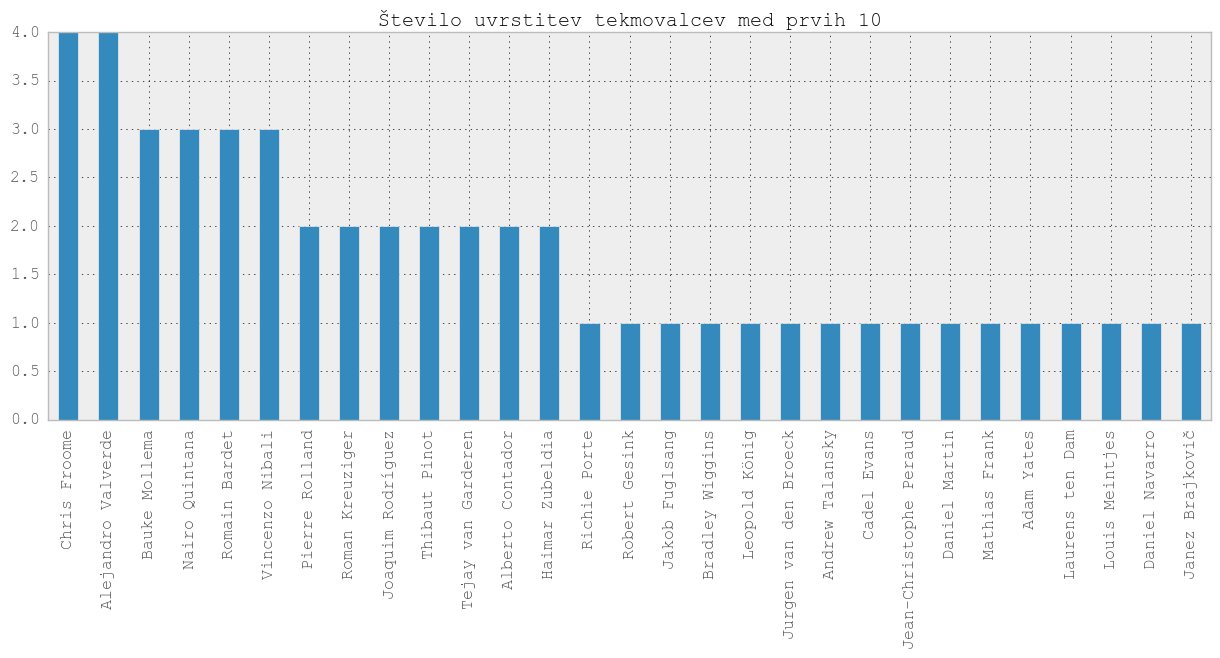

In [23]:
naj10['ime_tekmovalca'].value_counts().plot(kind='bar', fontsize='12',
                                            title='Število uvrstitev tekmovalcev med prvih 10')

Nič presenetljivega, Froome, Valverde, Mollema, Quintana, Bardet, Nibali, Rolland, Pinot, Contador, Yates itd. so trenutno 
najbolj konkurenčni kolesarji v svetovni eliti, zato se (še posebej za domačine) spodobi, da so favoriti na eni
najprestižnejših kolesarskih dirk, tj. na Touru.

In [8]:
#zmagovalci zadnjih petih let
najdrzave = tab[tab.mesto == 1][['leto', 'ime_tekmovalca', 'država']]
najekipe = tab[tab.mesto == 1][['leto', 'ekipa']]
pd.concat([najdrzave, najekipe['ekipa']], axis=1).set_index('leto')

,ime_tekmovalca,država,ekipa
leto,,,
2012,Bradley Wiggins,Velika Britanija,Team Sky
2013,Chris Froome,Velika Britanija,Team Sky
2014,Vincenzo Nibali,Italija,Astana
2015,Chris Froome,Velika Britanija,Team Sky
2016,Chris Froome,Velika Britanija,Team Sky


### Zastopanost držav med prvimi 10/50/ oz. vsemi uvrščenimi 

Zanima me odnos med številom uvrstitev in številom "dobrih" uvrstitev, zato si poglejmo sledeče razvrstitve.

In [17]:
p1 = pd.DataFrame(naj10['država'].value_counts()[:10])
p1.columns = ['št uvrstitev med prvih 10']
p1

,št uvrstitev med prvih 10
Španija,11
Francija,8
Velika Britanija,6
Nizozemska,5
Kolumbija,3
Češka,3
ZDA,3
Italija,3
Avstralija,2
Danska,1


In [18]:
p2 = pd.DataFrame(naj50['država'].value_counts()[:10])
p2.columns = ['št uvrstitev med prvih 50']
p2

,št uvrstitev med prvih 50
Francija,47
Španija,38
Nizozemska,20
Belgija,16
Italija,15
ZDA,12
Avstralija,11
Velika Britanija,10
Kolumbija,9
Irska,8


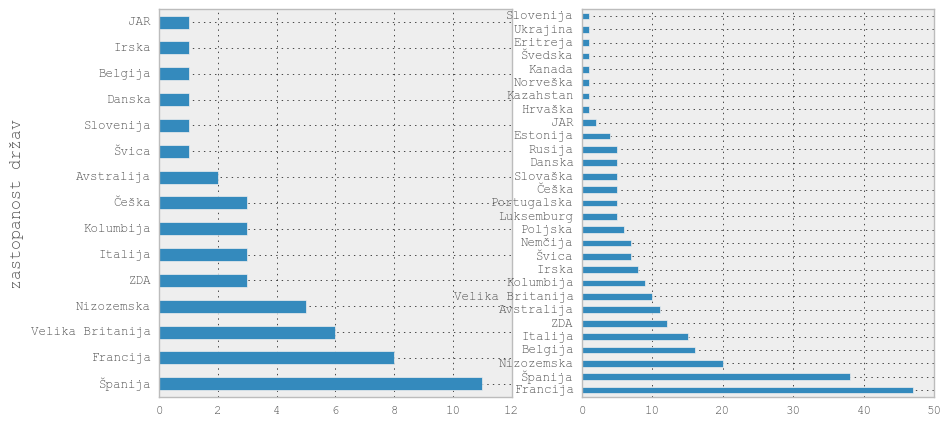

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i,var in enumerate([naj10['država'].value_counts(), 
                        naj50['država'].value_counts()]):
    var.plot(ax=axes[i], kind='barh',fontsize=9)
axes[0].set_ylabel('zastopanost držav')


Če se najprej omejimo na velesile, opazimo, da je sicer Francozov (na domačem terenu) več kot Špancev,
vendar pa so Španci dosegli boljše rezultate, tj. več uvrstitev med prvo deseterico.
Razveseljivo je, da tudi Slovenci sodimo v kategorijo manj zastopanih, a bolje uvrščenih.

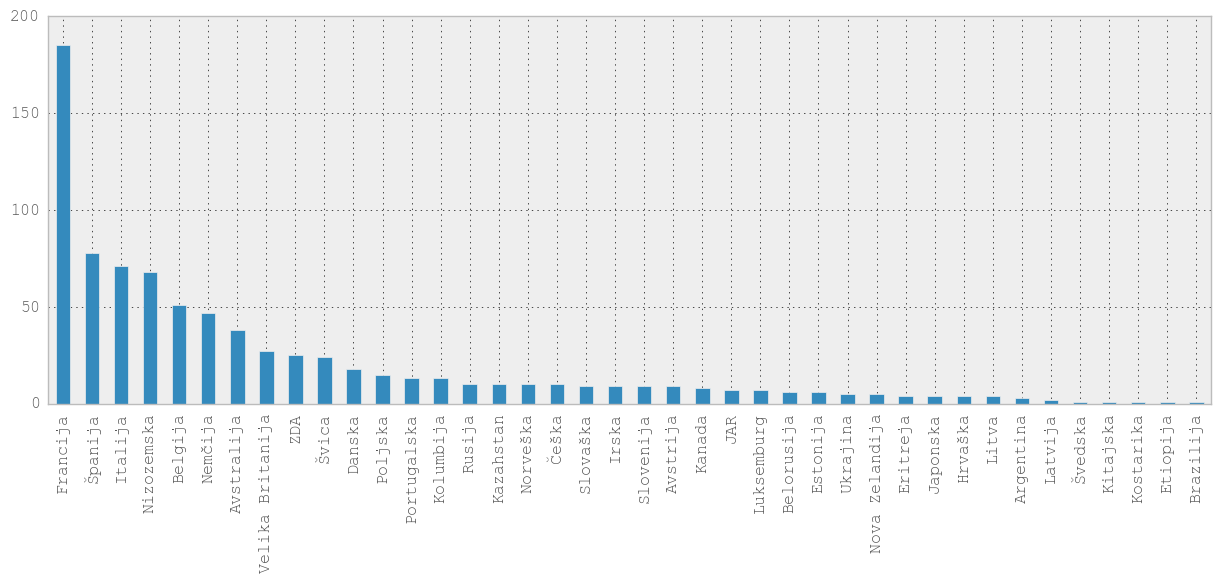

In [24]:
tab['država'].value_counts().plot(kind='bar', fontsize='12')

### Zastopanost ekip med prvimi 10/50 oz. vsemi uvrščenimi 

In [19]:
p3 = pd.DataFrame(naj10['ekipa'].value_counts())[:10]
p3.columns = ['št uvrstitev med prvih 10']
p3

,št uvrstitev med prvih 10
Movistar Team,7
Team Sky,5
Astana,4
AG2R La Mondiale,4
BMC Racing Team,4
Belkin Pro Cycling,3
Saxo-Tinkoff,2
Trek Factory Racing,2
Team Europcar,2
Tinkoff-Saxo,1


In [20]:
p4 = pd.DataFrame(naj50['ekipa'].value_counts())[:10]
p4.columns = ['št uvrstitev med prvih 50']
p4

,št uvrstitev med prvih 50
BMC Racing Team,21
Team Sky,20
Movistar Team,19
Astana,18
AG2R La Mondiale,17
Team Europcar,12
Team Katusha,9
Omega Pharma-Quick-Step,8
Belkin Pro Cycling,8
IAM Cycling,6


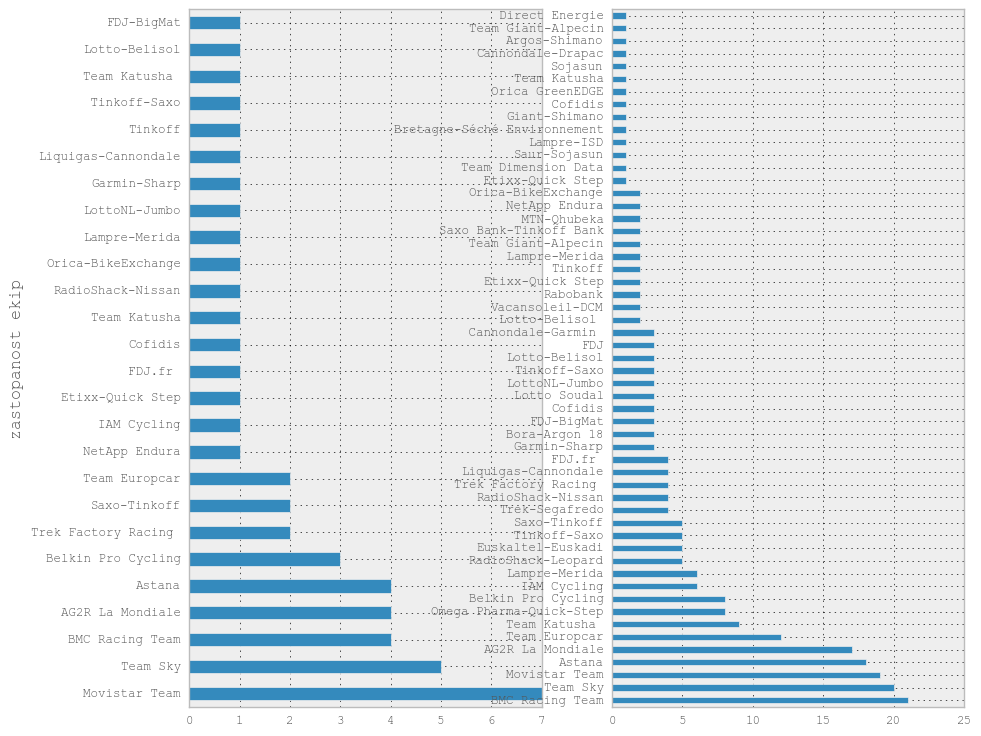

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 9))
for i,var in enumerate([naj10['ekipa'].value_counts(), 
                        naj50['ekipa'].value_counts()]):
    var.plot(ax=axes[i], kind='barh',fontsize=9)
axes[0].set_ylabel('zastopanost ekip')

Tudi če opazujemo razultate ekip opazimo, da so nekatere (BMC, Movistar) zgolj številčno zelo zastopane (imajo več članov, 
ki zgolj pomagajo vodilnim pri dosegu etapnih zmag itd. in ne ciljajo na višje uvrstitve).

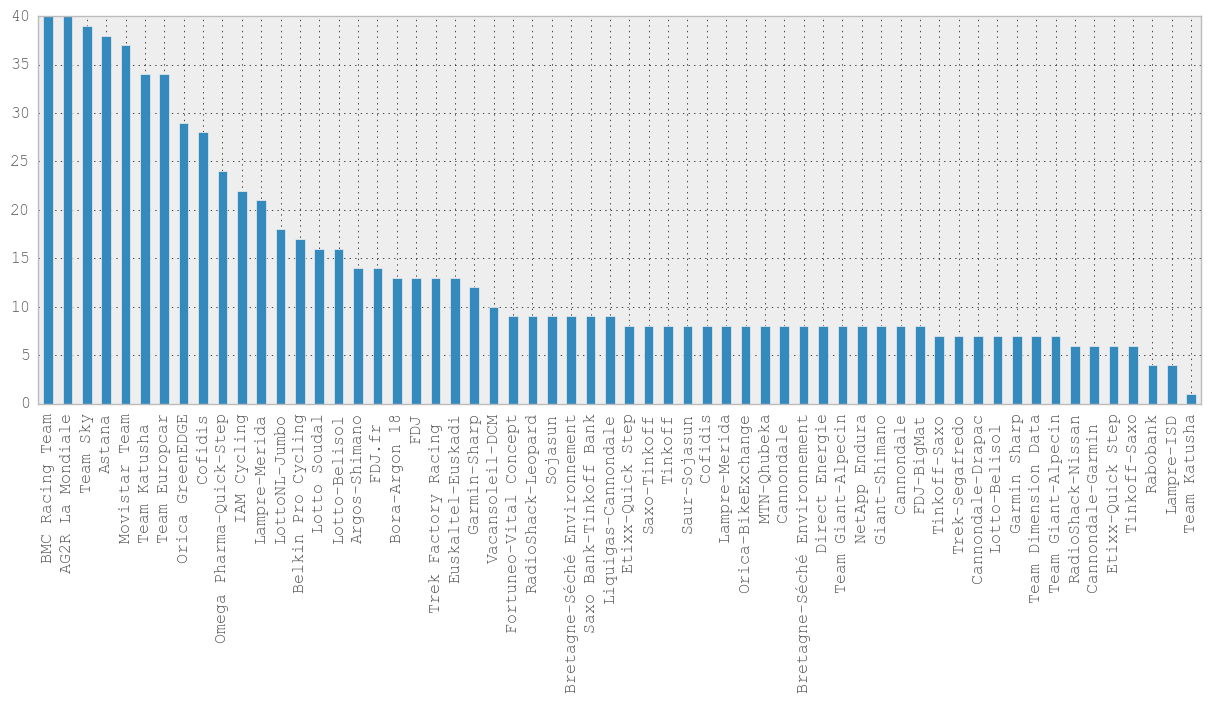

In [37]:
tab['ekipa'].value_counts().plot(kind='bar', fontsize='12')

Z namenom prikaza grafov določene oblike sem definirala funkcijo:

In [7]:
def graf(tabela, stolpec, naslov, imena):
    df = pd.concat([tabela[tabela.leto == 2012][stolpec].value_counts(), 
                    tabela[tabela.leto == 2013][stolpec].value_counts(), 
                    tabela[tabela.leto == 2014][stolpec].value_counts(), 
                    tabela[tabela.leto == 2015][stolpec].value_counts(), 
                    tabela[tabela.leto == 2016][stolpec].value_counts()], 
                   axis=1)
    df.columns = imena
    return df.plot(kind='bar', fontsize='12',title=naslov)

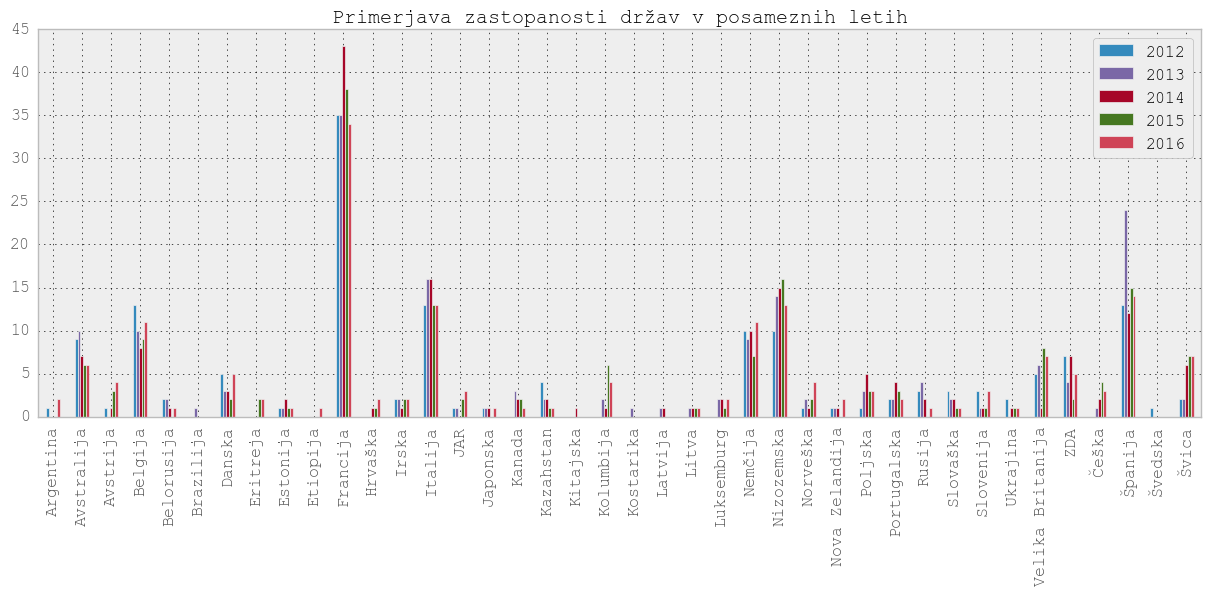

In [11]:
graf(tab, 'država', 'Primerjava zastopanosti držav v posameznih letih', 
    ['2012', '2013', '2014', '2015', '2016'])

Najbolj zastopane države so Francija (očitno), Španija, Italija in Nizozemska. Zanimivo je, da so prve tri gostiteljice treh najodmevnejših dirk v Evropi, ki so poleg Toura torej še La Vuelta in Giro d'Italia.
Slovenci simcer še čakamo na prvo (etapno) zmago, vendar se naši kolesarji redno udeležujejo Toura.

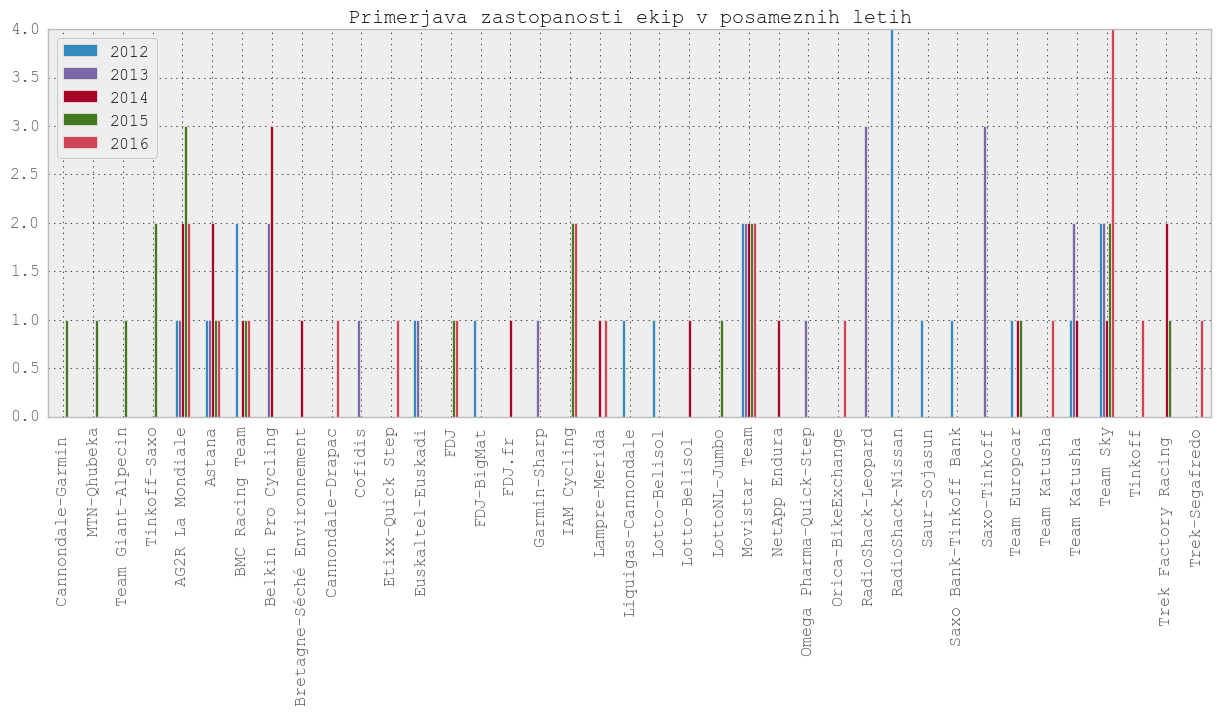

In [93]:
graf(tab, 'ekipa', 'Primerjava zastopanosti ekip v posameznih letih',
    ['2012', '2013', '2014', '2015', '2016'])

Tu sem vzela le prvih 20 iz razvrstitve, saj je ekip res ogromno in bi graf bil zelo nepregleden.
Vidimo konstantno prisotnost Movistarja in Sky-ja, kaj več pa ne moremo sklepati, saj so številke majhne.

### Časovni naskoki zmagovalcev

Ko se zdi, da je vodilni na tekmi določen že precej pred koncem, se pojavijo špekulacije o morebitnem rekordnem časovnem naskoku zmagovalca (v resnici pa vodilni največkrat zgolj taktizira in skuša izpeljati dirko do konca, po 
možnosti s čim manj nečloveških naporov...)

Kljub temu je zanimivo pogledati, kdaj so zmagovalci najbolj suvereno zmagali.

In [6]:
S = naj50[['leto', 'mesto', 'ime_tekmovalca', 'čas']]
najdva = S[S.mesto <= 2].set_index('leto')
naskok = S[S.mesto == 2][['leto', 'čas']].set_index('leto')

najdva

,mesto,ime_tekmovalca,čas
leto,,,
2012,1,Bradley Wiggins,87:34:47
2012,2,Christopher Froome,3:21
2013,1,Christopher Froome,83:56:40
2013,2,Nairo Quintana,4:20
2014,1,Vincenzo Nibali,89:59:06
2014,2,Jean-Christophe Peraud,7:37
2015,1,Christopher Froome,84:46:14
2015,2,Nairo Quintana,1:12
2016,1,Christopher Froome,89:04:48


In [13]:
max_naskok = naskok.sort_values('čas', ascending=False)
max_naskok.columns = ['zaostanek']
max_naskok

,zaostanek
leto,
2014,7:37
2013,4:20
2016,4:05
2012,3:21
2015,1:12


Najbolj suveren zmagovalec zadnjih 5 let je bil torej Nibali leta 2014.

## 2) Statistika etapnih zmag in profili etap

V tem razdelku analiziram podatke o dinamiki etap in etapnih uvrstitvah.
Vrste sem v grobem ločila (obstajajo seveda precej bolj razčlenjene razvrstitve, predvsem 
glede gorskih vzponov, ki imajo več kategorij) na :

* ravninske (sprinti)
* razgibane (nedoločeno-blagi vzponi in ravninski deli)
* gorske
* samostojni/ moštveni/ gorski kronometer (tekma na čas)

Tour je spremenljivo tekmovanje, saj so frekvence različnih vrst etap zgolj okvirno določene, 
nekatera leta je npr. več kronometrov ali vzponov višje kategorije kot druga, pa tudi 
etapni cilji in s tem dolžine etap se spreminjajo.

In [3]:
etape = pd.read_csv('etape.csv')
etape[:15]

,leto,št_etape,vrsta_etape,dolžina_etape,ime_tekmovalca,država,ekipa
0,2012,1,samostojni kronometer,6.4,Fabian Cancellara,Švica,RadioShack–Nissan
1,2012,2,ravninska,198.0,Peter Sagan,Slovaška,Liquigas–Cannondale
2,2012,3,ravninska,207.5,Mark Cavendish,Velika Britanija,Team Sky
3,2012,4,razgibana,197.0,Peter Sagan,Slovaška,Liquigas–Cannondale
4,2012,5,ravninska,214.5,André Greipel,Nemčija,Lotto–Belisol
5,2012,6,ravninska,196.5,André Greipel,Nemčija,Lotto–Belisol
6,2012,7,ravninska,207.5,Peter Sagan,Slovaška,Liquigas–Cannondale
7,2012,8,razgibana,199.0,Chris Froome,Velika Britanija,Team Sky
8,2012,9,razgibana,157.5,Thibaut Pinot,Francija,FDJ–BigMat
9,2012,10,samostojni kronometer,41.5,Bradley Wiggins,Velika Britanija,Team Sky


### Profili etap - (povprečne) dolžine in frekvenca vrst 

Najprej nekaj tehničnih podatkov o pogostosti vrst in razlikah med vrstami:

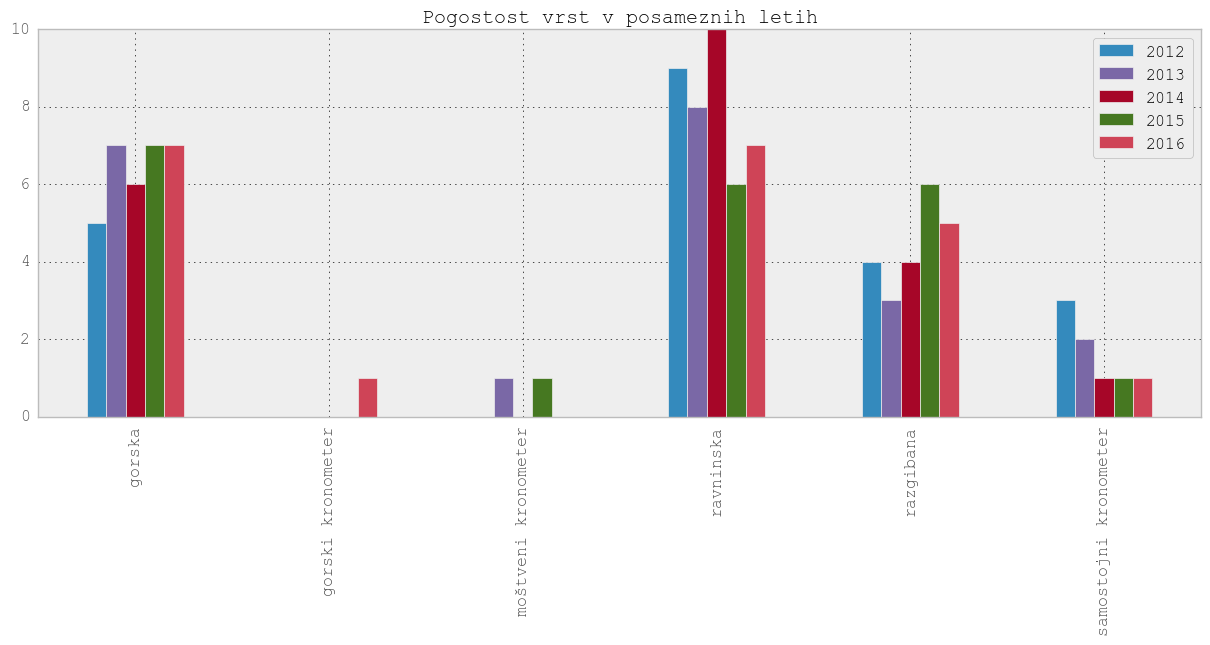

In [97]:
graf(etape, 'vrsta_etape', 'Pogostost vrst v posameznih letih', 
    ['2012', '2013', '2014', '2015', '2016'])

Največ je, razumljivo, ravninskih oz. razgibanih etap (ki bi lahko v grobem spadale v isto kategorijo), 
gorske so najbolj aktualne v zadnjem tednu, ko se karavana prebija skozi Alpe, 
samostojnih kronometrov ne organizirajo več kot dvakrat na tekmo,
gorski/moštveni kronometri so pa bolj kot ne redkost in jih ne uvrstijo v vsakoletni program.

[<matplotlib.text.Text at 0xdd16d30>, <matplotlib.text.Text at 0xdcd75c0>]

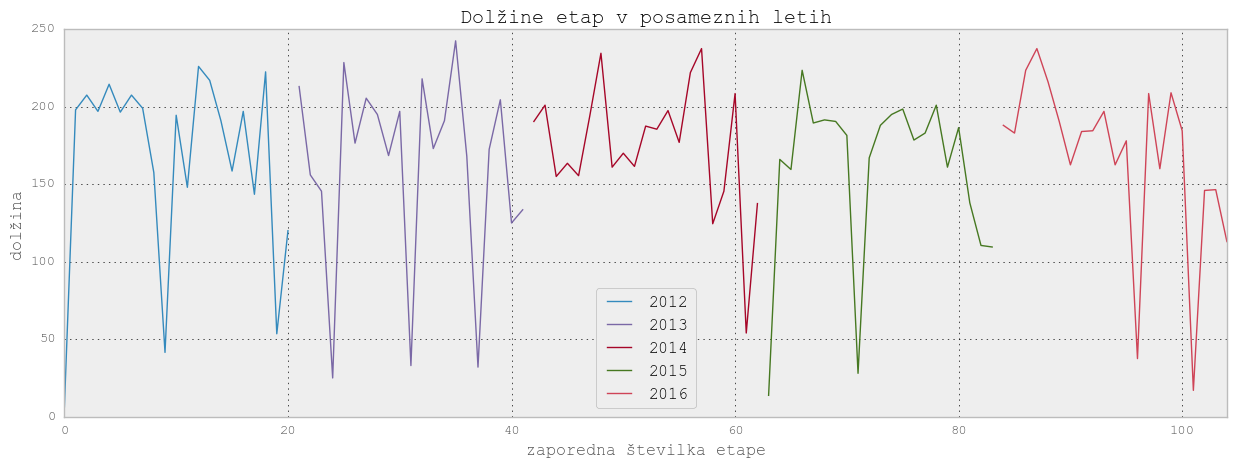

In [98]:
d2 = pd.DataFrame(etape[etape.leto == 2012]['dolžina_etape'])
d2.columns = ['2012']
d3 = pd.DataFrame(etape[etape.leto == 2013]['dolžina_etape'])
d3.columns = ['2013']
d4 = pd.DataFrame(etape[etape.leto == 2014]['dolžina_etape'])
d4.columns = ['2014']
d5 = pd.DataFrame(etape[etape.leto == 2015]['dolžina_etape'])
d5.columns = ['2015']
d6 = pd.DataFrame(etape[etape.leto == 2016]['dolžina_etape'])
d6.columns = ['2016']
D0 = pd.concat([d2, d3, d4, d5, d6], axis=1)
D0
D0.plot(title='Dolžine etap v posameznih letih').set(xlabel="zaporedna številka etape", ylabel="dolžina")

Ostre špice na grafu očitno ustrezajo kronometrom (takih ali drugačnih vrst), dolžine ostalih vrst etap pa so v povprečju dokaj podobne, kar pokaže sledeča tabela:

In [74]:
gore = etape[etape.vrsta_etape == 'gorska'].groupby('vrsta_etape').mean()['dolžina_etape']
ravnine = etape[etape.vrsta_etape == 'ravninska'].groupby('vrsta_etape').mean()['dolžina_etape']
razgib = etape[etape.vrsta_etape == 'razgibana'].groupby('vrsta_etape').mean()['dolžina_etape']
krono = etape[etape.vrsta_etape == 'samostojni kronometer'].groupby('vrsta_etape').mean()['dolžina_etape']
gorkro = etape[etape.vrsta_etape == 'gorski kronometer'].groupby('vrsta_etape').mean()['dolžina_etape']
povpr = pd.DataFrame(pd.concat([gore, ravnine, razgib, krono, gorkro]).round(2))
povpr.columns = ['povprečna dolžina etape']
povpr

,povprečna dolžina etape
vrsta_etape,
gorska,172.59
ravninska,188.19
razgibana,184.59
samostojni kronometer,33.96
gorski kronometer,17.00


In še povprečje dolžin vseh vrst etap:

In [31]:
po = etape.groupby('leto', as_index=False).mean()[['leto', 'dolžina_etape']]
po.columns = ['leto', 'povprečje dolžin etap']
po0 = po.sort_values('povprečje dolžin etap', ascending=False).set_index('leto')
po0.round(2)

,povprečje dolžin etap
leto,
2014,174.45
2016,168.05
2012,166.52
2013,162.07
2015,160.01


Zdi se, da so leta 2014 kolesarji v povprečju prevozili več, vendar pa je bilo v resnici tistega leta le manj 
kronometrov, ki bi nižali povprečje.

### Najuspešnejša država/ekipa po št. etapnih zmag 

#### a) Tekmovalci 

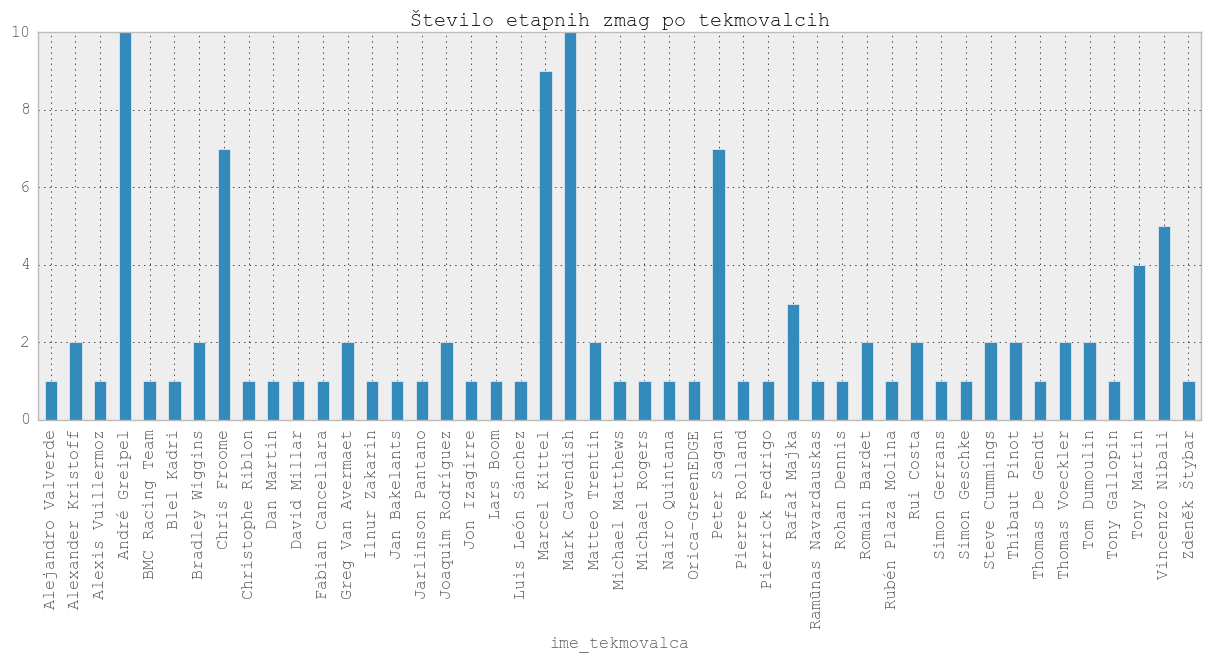

In [54]:
etekm = etape.groupby('ime_tekmovalca').size()
etekm.plot(kind='bar', title='Število etapnih zmag po tekmovalcih', fontsize='12')

Chris Froome, zmagovalec kar treh od zadnjih petih dirk, še zdaleč ni na prvem mestu.

#### b) Države 

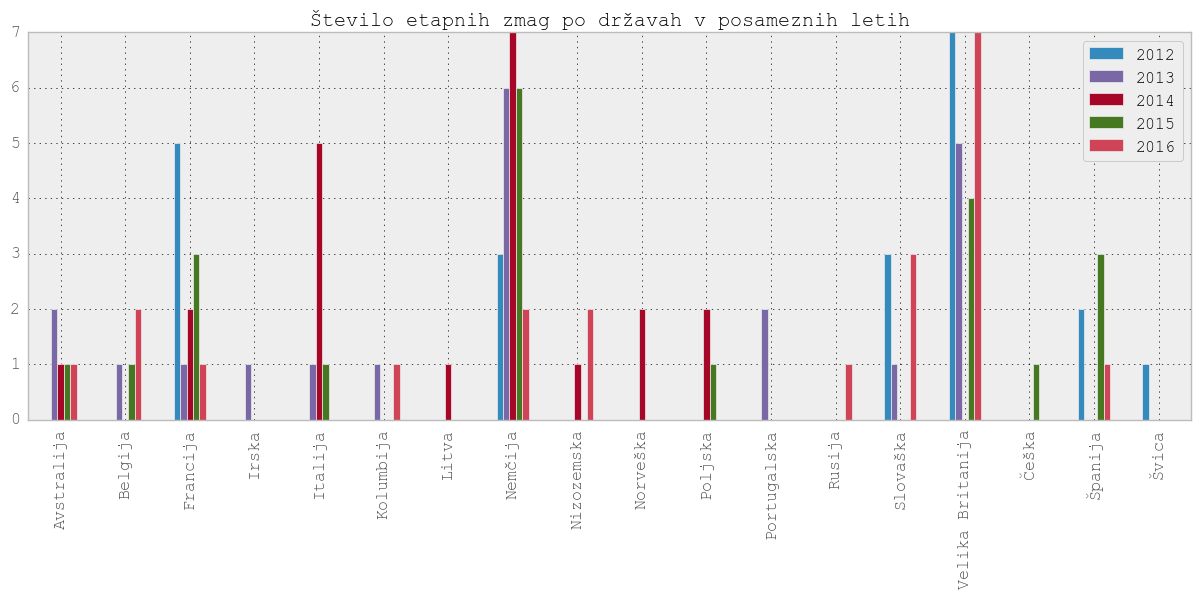

In [94]:
graf(etape, 'država', 'Število etapnih zmag po državah v posameznih letih', 
    ['2012', '2013', '2014', '2015', '2016'])

#### c) Ekipe 

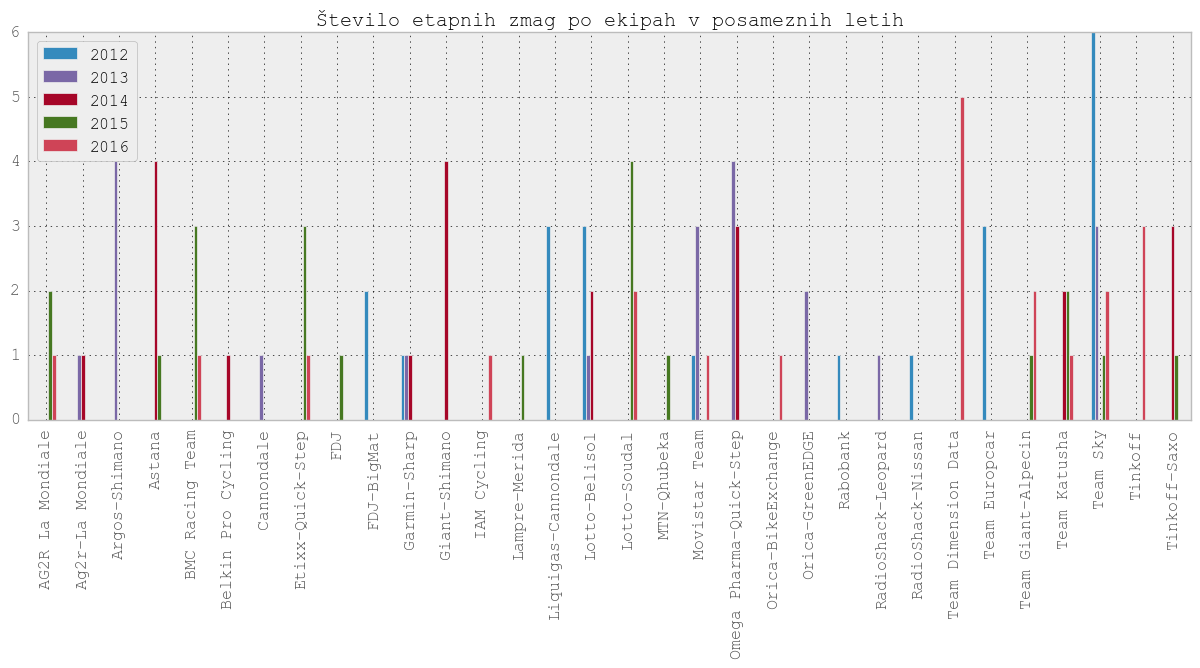

In [95]:
graf(etape, 'ekipa', 'Število etapnih zmag po ekipah v posameznih letih', 
    ['2012', '2013', '2014', '2015', '2016'])

### Uspešnost držav/ekip v različnih vrstah etap

Zanima me, ali so določene ekipe/države boljše v določenih vrstah etap (npr. katera država ima več trdoživih 
kolesarjev, tj. takih, ki so najboljši v gorskih vzponih).

#### a) Tekmovalci 

Ta del analize uspešnosti v različnih vrstah etap je še najbolj smiseln, 
saj se utemeljeno zdi, da specializiranost tekmovalca za neko vrsto ni pretirano
odvisna od porekla ali ekipe.

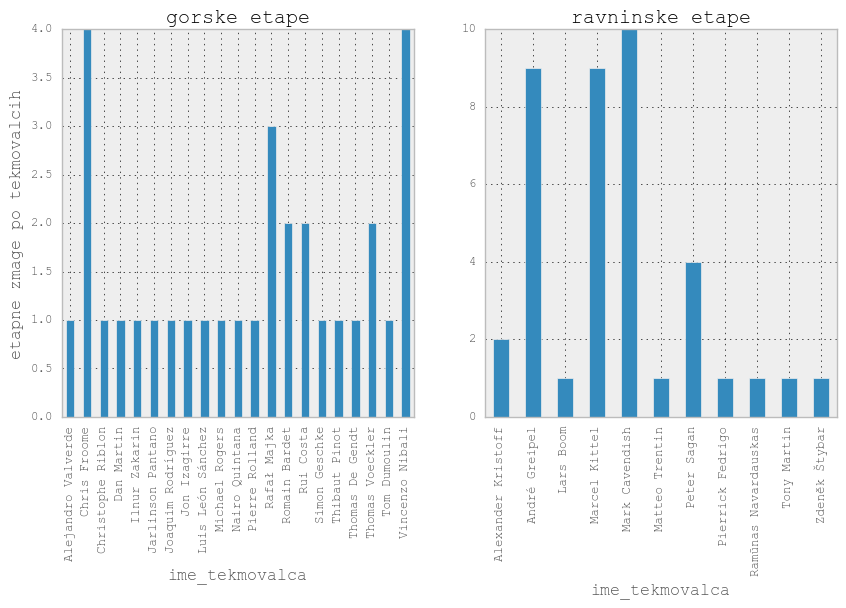

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i,var in enumerate([(etape[etape.vrsta_etape == 'gorska'].groupby('ime_tekmovalca').size(), 'gorske etape'), 
                        (etape[etape.vrsta_etape == 'ravninska'].groupby('ime_tekmovalca').size(), 'ravninske etape')]):
    var[0].plot(ax=axes[i], kind='bar',fontsize=9, title = var[1])
axes[0].set_ylabel('etapne zmage po tekmovalcih')

Specialisti za šprinte so torej Greipel, Kittel, Cavendish in Sagan(še v vzponu), medtem ko so v gorskih vzponih 
najboljši Froome, Nibali, Majka, Costa in Bardet (pa tudi Pinot, čeprav ni razvidno).

Opazimo, da so zmage gorskih etap porazdeljene med več kolesarjev kot zmage ravninskih etap.

#### b) Države 

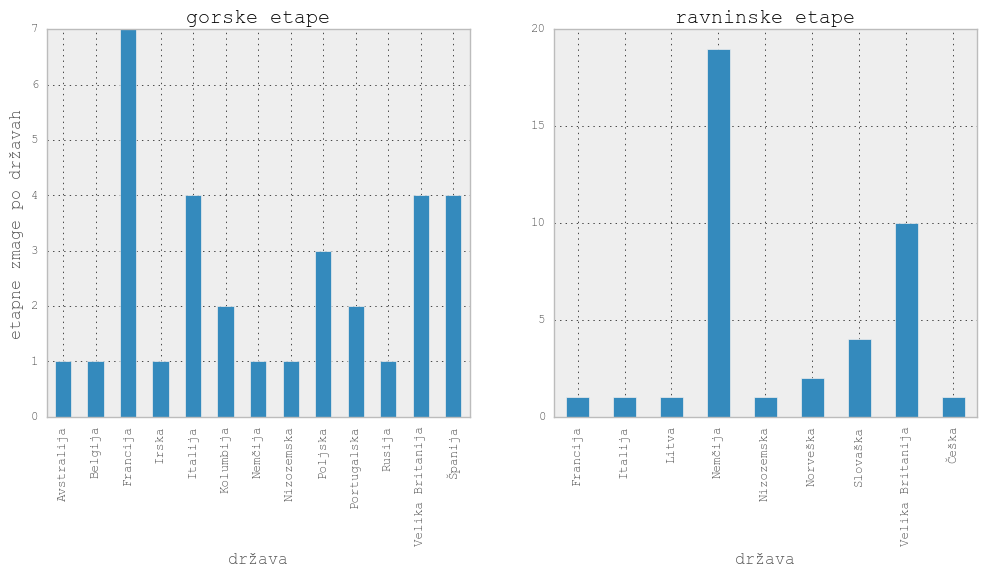

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i,var in enumerate([(etape[etape.vrsta_etape == 'gorska'].groupby('država').size(), 'gorske etape'), 
                        (etape[etape.vrsta_etape == 'ravninska'].groupby('država').size(), 'ravninske etape')]):
    var[0].plot(ax=axes[i], kind='bar',fontsize=9, title = var[1])
axes[0].set_ylabel('etapne zmage po državah')

Rezultati kažejo, da so države z največ gorskih etapnih zmag velesile + Poljska po zaslugi Rafala Majke.

#### c) Ekipe 

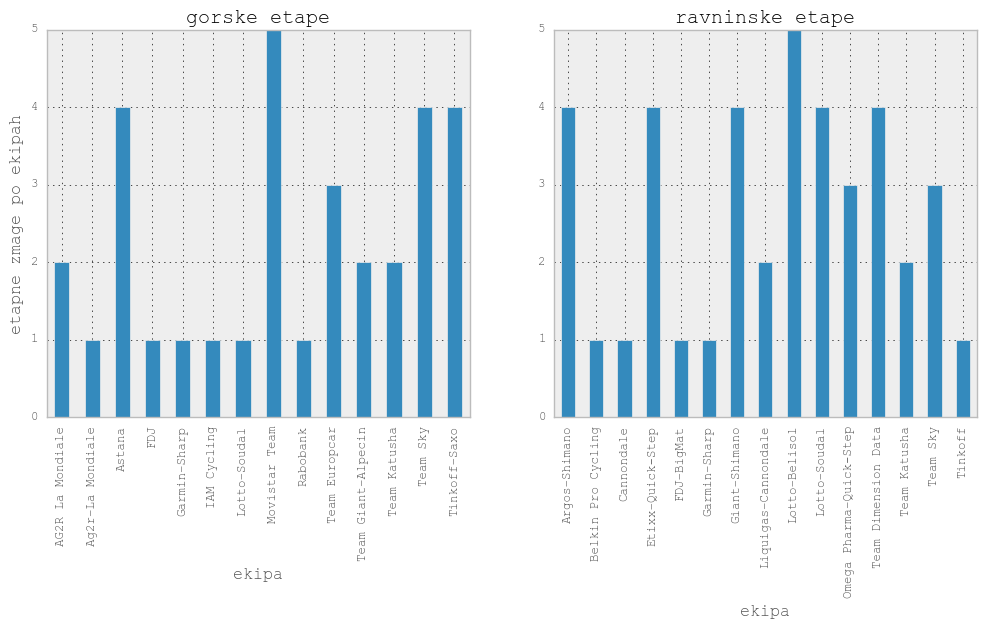

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i,var in enumerate([(etape[et.vrsta_etape == 'gorska'].groupby('ekipa').size(), 'gorske etape'), 
                        (etape[et.vrsta_etape == 'ravninska'].groupby('ekipa').size(), 'ravninske etape')]):
    var[0].plot(ax=axes[i], kind='bar',fontsize=9, title = var[1])
axes[0].set_ylabel('etapne zmage po ekipah')

Ekipe si ravninske oz. gorske etapne zmage delijo bolj enakomerno kot države. Movistar, Astana in Sky prednjačijo pri gorskih, npr. Lotto-Belisol (Belgijci), Giant-Shimano (Nizozemci) pa pri šprinterskih ciljih.

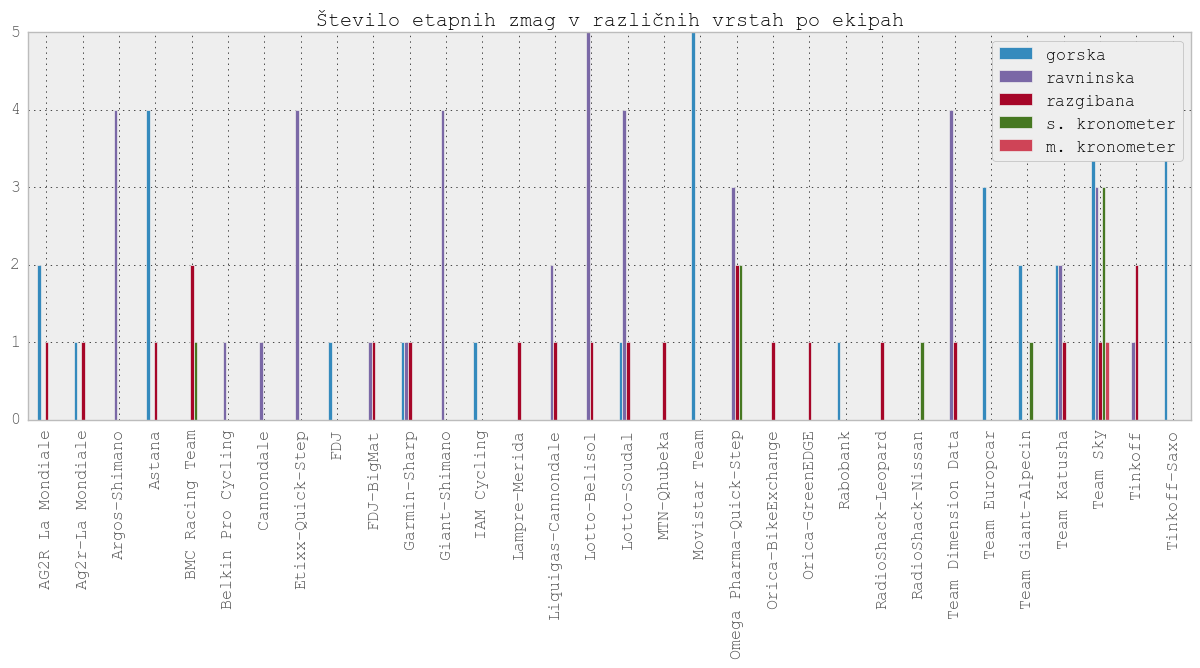

In [174]:
graf(etape, 'ekipa', 'Število etapnih zmag v različnih vrstah po ekipah', 
    ['gorska', 'ravninska', 'razgibana', 's. kronometer', 'm. kronometer'])

Manjše ekipe imajo večinoma po eno etapno zmago (večinoma v razgibanih etapah, tj. bolj ali manj v šprintih),
Sky in Omega imata najbolj pester nabor etapnih zmag,
Movistar ima največ gorskih zmag, a drugih sploh nima.

## 3) Zelena, bela, pikčasta majica, ekipna uvrstitev-najboljših 10

*Končni nosilec zelene majice je zmagovalec po številu zbranih točk na vmesnih sprintih in (odvisno od etape) ciljih etap. Število doseženih točk variira glede na vrsto etape.*

*Seštevek za belo majico je podoben tistemu za rumeno, le da so uvrščeni le kolesarji, mlajši od 25 let.*

*Pikčasto majico osvoji kolesar, ki zbere največ točk na vmesnih gorskih ciljih. Število podeljenih točk je odvisno od kategorije vzpona.*

### Analiza glede na posamezno kategorijo

### a) Zelena majica (točke) 

In [100]:
z = pd.read_csv('zelena.csv')
z.insert(2, 'vrsta_majice', 'Zelena')

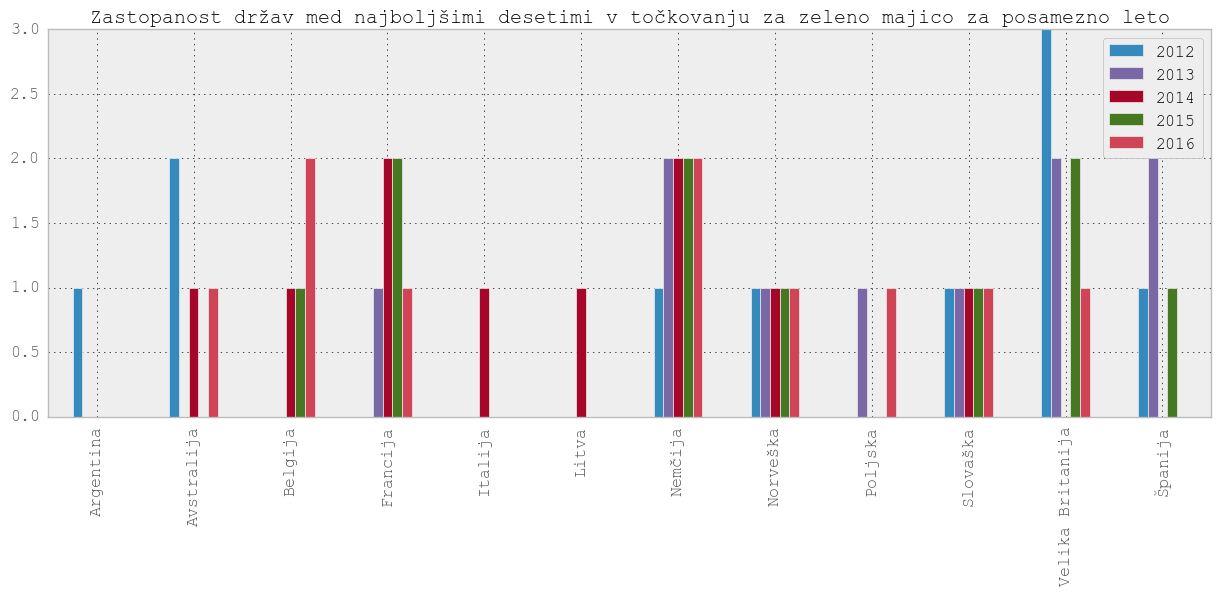

In [101]:
graf(z, 'država', 'Zastopanost držav med najboljšimi desetimi v točkovanju za zeleno majico za posamezno leto', 
    ['2012', '2013', '2014', '2015', '2016'])

Norveške zmage je dosegel Kristoff, Slovaške pa Sagan, ostale države imajo bolj raznoliko zastopanost zmagovalcev. 

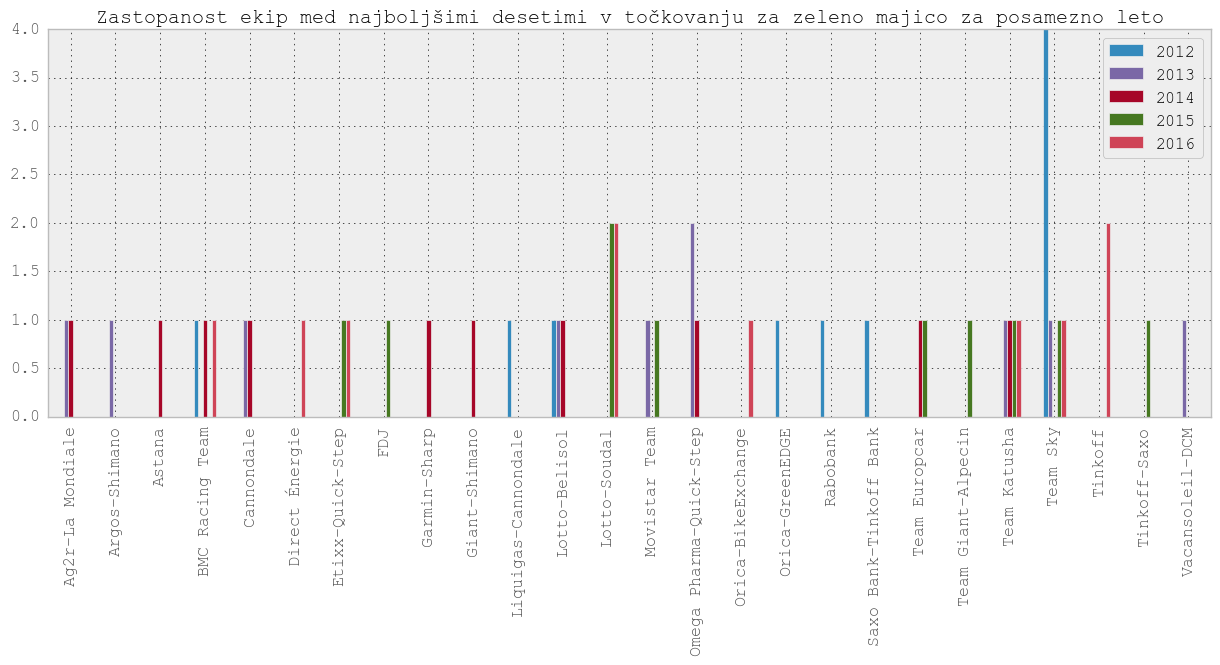

In [103]:
graf(z, 'ekipa', 'Zastopanost ekip med najboljšimi desetimi v točkovanju za zeleno majico za posamezno leto', 
    ['2012', '2013', '2014', '2015', '2016'])

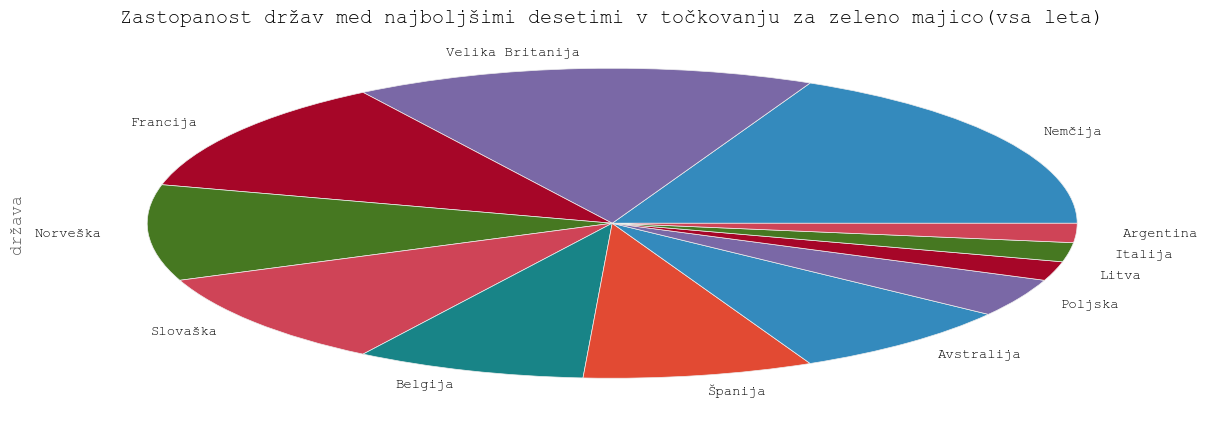

In [112]:
z['država'].value_counts().plot(kind='pie', 
                                title='Zastopanost držav med najboljšimi desetimi v točkovanju za zeleno majico(vsa leta)')

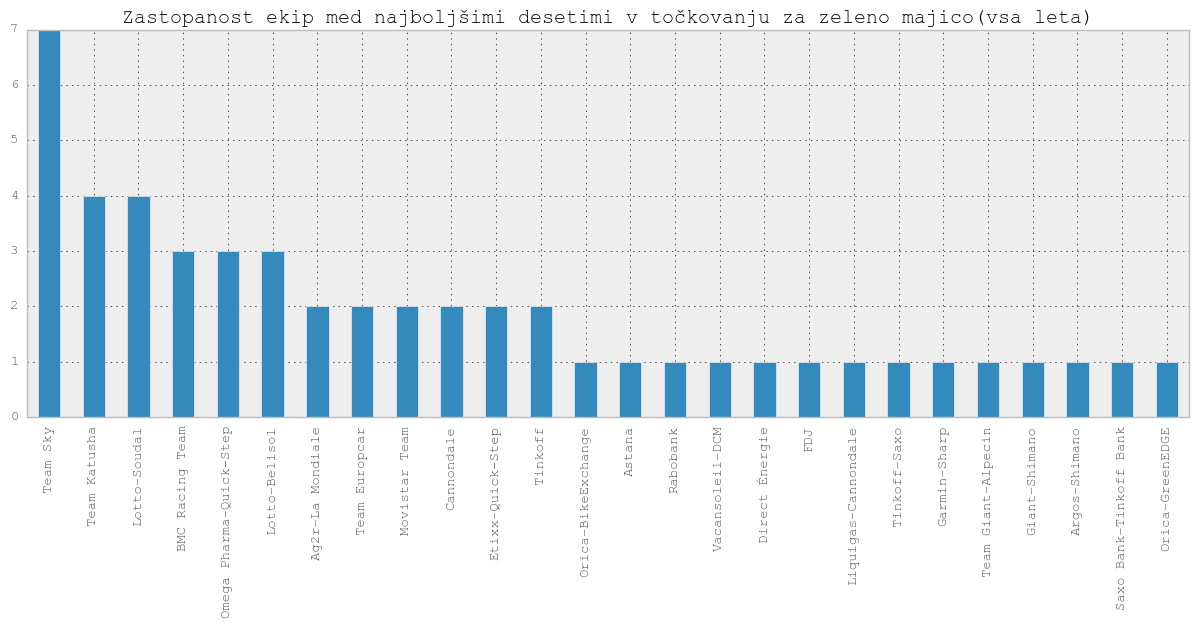

In [113]:
z['ekipa'].value_counts().plot(kind='bar',
                               title='Zastopanost ekip med najboljšimi desetimi v točkovanju za zeleno majico(vsa leta)')

### b) Pikčasta majica (vmesni gorski cilji) 

In [106]:
p = pd.read_csv('pikčasta.csv')
p.insert(2, 'vrsta_majice', 'Pikčasta')

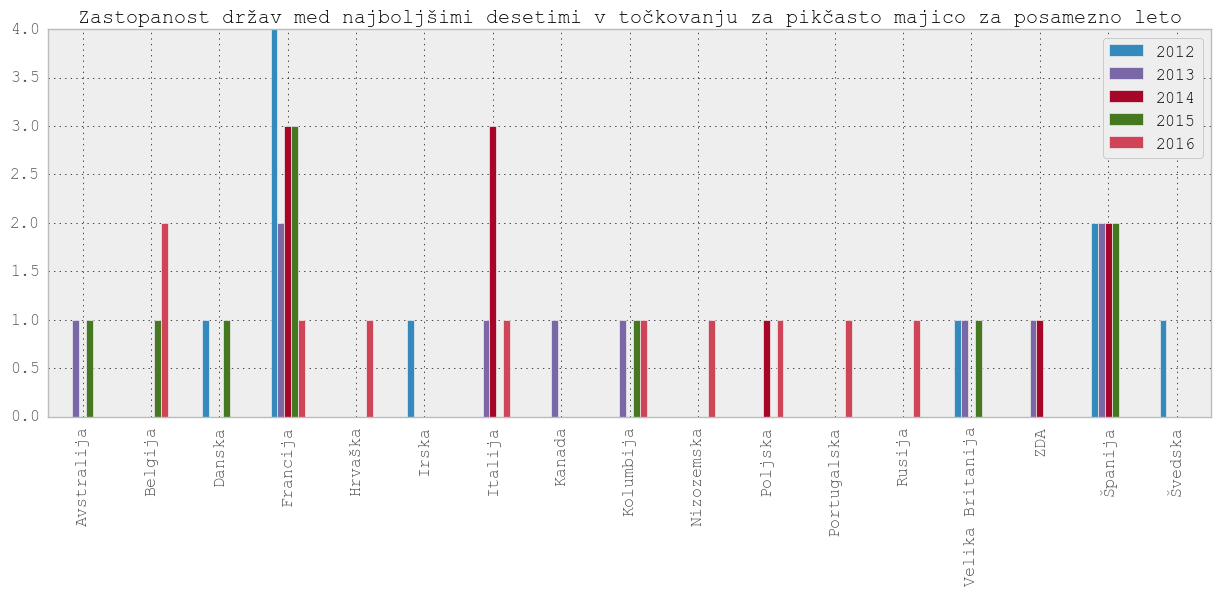

In [108]:
graf(p, 'država', 'Zastopanost držav med najboljšimi desetimi v točkovanju za pikčasto majico za posamezno leto', 
    ['2012', '2013', '2014', '2015', '2016'])

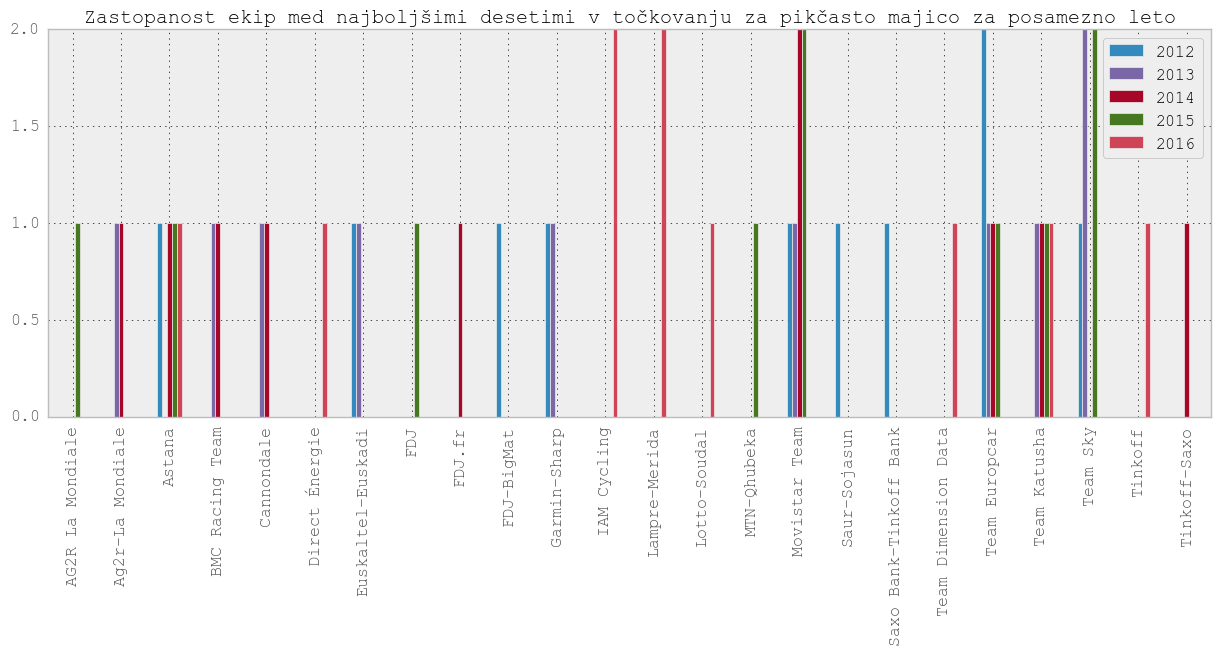

In [109]:
graf(p, 'ekipa', 'Zastopanost ekip med najboljšimi desetimi v točkovanju za pikčasto majico za posamezno leto', 
    ['2012', '2013', '2014', '2015', '2016'])

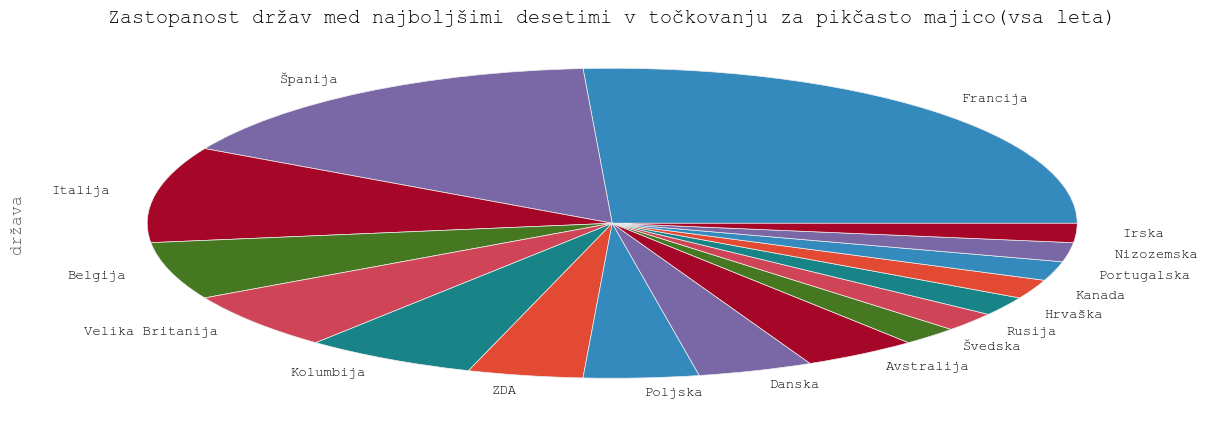

In [119]:
p['država'].value_counts().plot(kind='pie', 
                                title='Zastopanost držav med najboljšimi desetimi v točkovanju za pikčasto majico(vsa leta)')

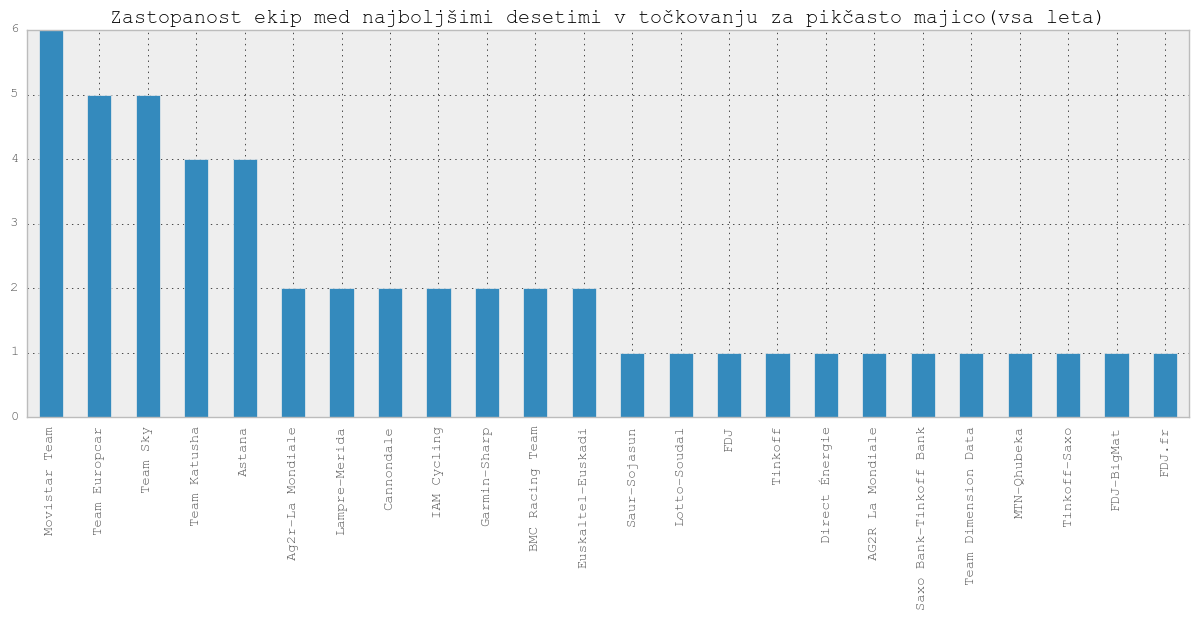

In [120]:
p['ekipa'].value_counts().plot(kind='bar', 
                               title='Zastopanost ekip med najboljšimi desetimi v točkovanju za pikčasto majico(vsa leta)')

### (c) Bela majica (pod 25 let) )

In [75]:
b = pd.read_csv('bela.csv').insert(2, 'vrsta_majice', 'Bela')

O točkovanju za belo majico nekaj v spodnjem razdelku.

### Splošna analiza - največ osvojenih majic skozi leta 

Zanimalo me je tudi, koliko etapnih zmag so osvojili zmagovalci. Spodnji rezultati si od zgoraj navzdol sledijo po 
zaporednih letih (najprej 2012).
Očitno je najbolj taktiziral, tj. dosegal povprečne etapne čase brez večjih presežkov in zanosov,
Froome leta 2015.

In [154]:
def zmage_r(sez):
    for par in sez:
        print(par[0][par[0]['ime_tekmovalca'] == par[1]]['ime_tekmovalca'].value_counts())
zmage_r([(etape[etape.leto == 2012],'Bradley Wiggins'), 
         (etape[etape.leto == 2013],'Chris Froome'), 
         (etape[etape.leto == 2014],'Vincenzo Nibali'), 
         (etape[etape.leto == 2015],'Chris Froome'), 
         (etape[etape.leto == 2016],'Chris Froome')])

Bradley Wiggins    2
Name: ime_tekmovalca, dtype: int64
Chris Froome    3
Name: ime_tekmovalca, dtype: int64
Vincenzo Nibali    4
Name: ime_tekmovalca, dtype: int64
Chris Froome    1
Name: ime_tekmovalca, dtype: int64
Chris Froome    2
Name: ime_tekmovalca, dtype: int64


V tabelah z generalnimi uvrstitvami manjkajo podatki o vrsti majice ipd., zato jih ročno dodam,
 saj bom te potrebovala za spodnje grafe.

In [49]:
najdrzave.insert(3, 'vrsta_majice', 'Rumena')

In [50]:
najekipe.insert(3, 'vrsta_majice', 'Rumena')

In [51]:
majice = pd.concat([z[z.mesto == 1], p[p.mesto == 1], 
                    b[b.mesto == 1]])[['leto', 'ime_tekmovalca', 'država', 'ekipa', 'vrsta_majice']]
majiced = pd.concat([majice[['leto', 'ime_tekmovalca', 'država', 'vrsta_majice']], 
                     najdrzave[['ime_tekmovalca', 'država', 'vrsta_majice']]])
majicee = pd.concat([majice[['leto', 'ime_tekmovalca', 'ekipa', 'vrsta_majice']], 
                     najekipe[['ime_tekmovalca', 'ekipa', 'vrsta_majice']]])

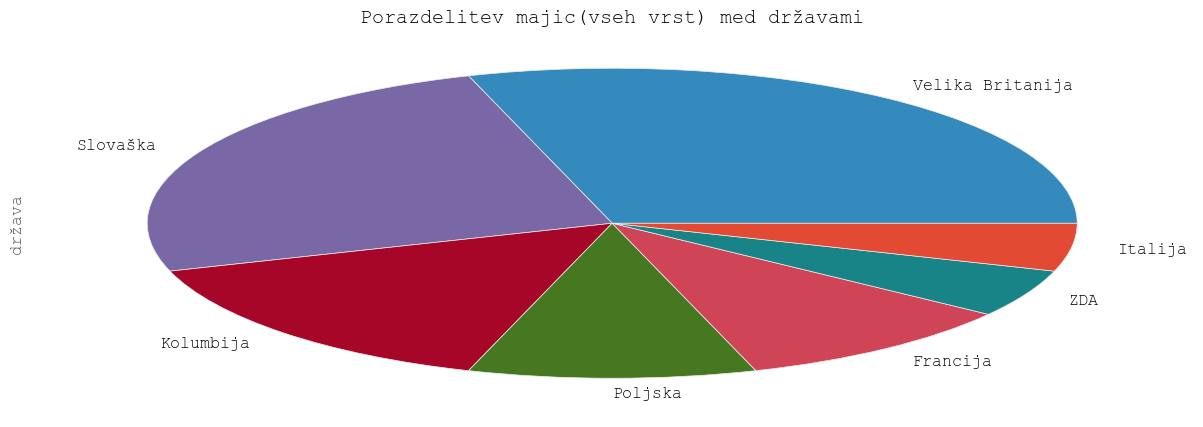

In [52]:
majiced['država'].value_counts().plot(kind='pie', fontsize='12',
                                      title='Porazdelitev majic(vseh vrst) med državami')

Največ majic (tudi največ rumenih) je osvojila Velika Britanija, Francozi kot domačini in kolesarska velesila niso niti med prvimi tremi, Špancev pa v tej razrstitvi sploh ni, čeprav so bili masovno zastopani in so dosegli več uvrstitev med prvih 10 kot Francozi.

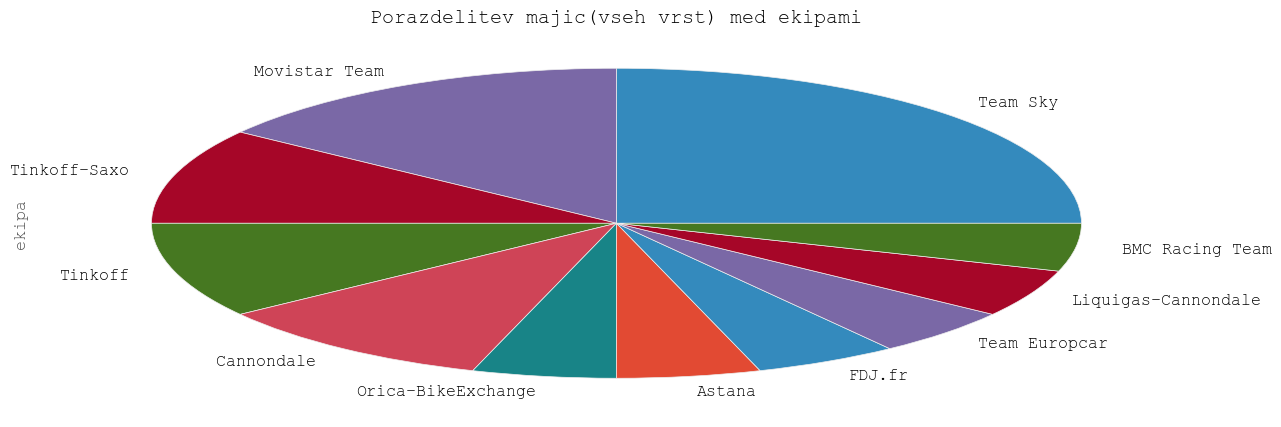

In [53]:
majicee['ekipa'].value_counts().plot(kind='pie', fontsize='12',
                                    title='Porazdelitev majic(vseh vrst) med ekipami')

Ekipi, ki prednjačita tako po številu članov kot po številu majic, sta Sky in Movistar. Zanimiva sta deleža Astane 
in BMC-ja, ki sta dokaj majhna v primerjavi z velikim številom članov.

### Rumena vs. Bela 

Časovni naskoki belih majic niso tako vroča tema kot tisti rumenih, vendar si je zanimivo ogledati 
tudi razlike v le-teh. 

In [50]:
naskokb = B[B.mesto == 2][['leto', 'čas']].set_index('leto')
naskokb.columns = ['zaostanek bela']
naskok0 = pd.DataFrame(naskok['čas'])
naskok0.columns = ['zaostanek rumena']
naskok0.join(naskokb)

,zaostanek rumena,zaostanek bela
leto,,
2012,3:21,6:13
2013,4:20,13:19
2014,7:37,3:11
2015,1:12,14:48
2016,4:05,2:16


V resnici bele majice zmagujejo s precej večjo časovno prednostjo, je pa tudi res, 
da jih je manj.
Poglejmo si še, koliko tekmovalcev, mlajših od 25 let je bilo v posameznem letu:

In [29]:
vsi0 = pd.concat([rs2, rs3, rs4, rs5, rs6])
beli1 = vsi0[vsi0.starost <= 25]
ena = pd.DataFrame(beli1['leto'].value_counts())
dva = pd.DataFrame(beli0['leto'].value_counts())
tri = pd.concat([ena, dva], axis=1)
tri.columns = ['pod 25', 'vsi']
tri

,pod 25,vsi
2012,26,124
2013,30,143
2014,22,135
2015,32,136
2016,31,152


Konec:)